In [1]:
import pandas as pd
import numpy as np

In [2]:
import os

In [3]:
CURRENT_DIR = os.getcwd()

In [4]:
DATASET_DIR = 'customer-segmentation-dataset'

In [5]:
DATASET_NAME = 'Mall_Customers.csv'

In [6]:
dataset = pd.read_csv(os.path.join(CURRENT_DIR, DATASET_DIR, DATASET_NAME))

In [7]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
sex = dataset.groupby('Gender').size().to_frame('count').reset_index()

In [9]:
sex

,Gender,count
0,Female,112
1,Male,88


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

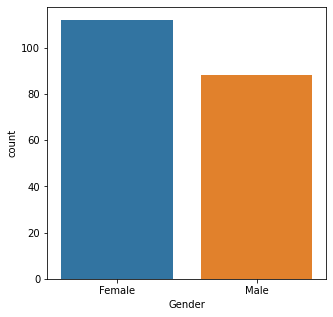

In [11]:
fig = plt.figure(figsize = (5, 5))
sns.barplot(x = 'Gender', y = 'count', data = sex)
plt.show()

In [12]:
dataset.groupby('Gender').agg({'Age' : {'min', 'max', 'mean', 'median'}})

Age                   
       median       mean max min
Gender                          
Female     35  38.098214  68  18
Male       37  39.806818  70  18

In [13]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


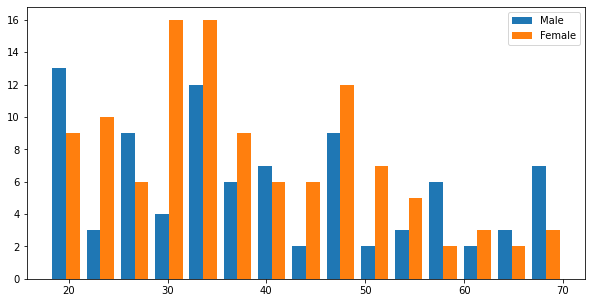

In [14]:
fig = plt.figure(figsize = (10, 5))
plt.hist((dataset[dataset['Gender'] == 'Male']['Age'], dataset[dataset['Gender'] == 'Female']['Age']), bins = 15, rwidth=0.8)
plt.legend(('Male', 'Female'), loc = 'upper right')
plt.show()

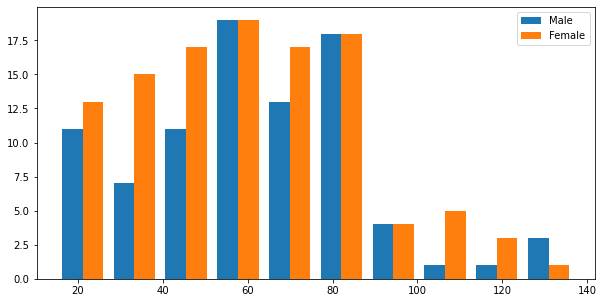

In [15]:
fig = plt.figure(figsize = (10, 5))
plt.hist((dataset[dataset['Gender'] == 'Male']['Annual Income (k$)'], dataset[dataset['Gender'] == 'Female']['Annual Income (k$)']), bins = 10, rwidth=0.8)
plt.legend(('Male', 'Female'), loc = 'upper right')
plt.show()

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
one_hot = OneHotEncoder()
cat_one_hot = one_hot.fit_transform(dataset.iloc[:, [1]])

In [18]:
one_hot.categories_

[array(['Female', 'Male'], dtype=object)]

In [19]:
dataset.drop('Gender', axis = 1).join(pd.DataFrame({'Female' : cat_one_hot.toarray().astype(np.uint8)[:, 0], 'Male' : cat_one_hot.toarray().astype(np.uint8)[:, 1]}))

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


In [20]:
dataset_hot = pd.get_dummies(dataset)

In [21]:
dataset_hot = dataset_hot.iloc[:, 1:]

In [22]:
dataset_hot

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [23]:
from plots import *

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.98)

In [25]:
dataset_hot_98 = pca.fit_transform(dataset_hot)

In [26]:
np.shape(dataset_hot_98)

(200, 3)

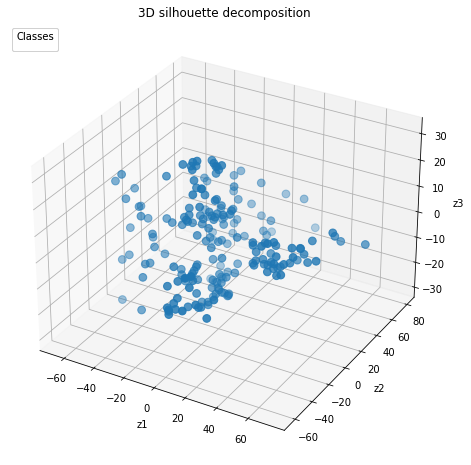

In [27]:
draw3D(dataset_hot_98, labels = None)

In [28]:
print(sum(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_)

0.999683702222039
[0.45110884 0.44084615 0.1077287 ]


In [29]:
pca2 = PCA(n_components = 2)
dataset_hot_2 = pca2.fit_transform(dataset_hot)

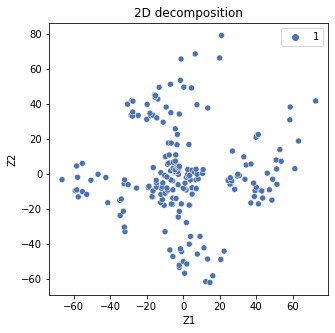

In [30]:
draw2D(dataset_hot_2, labels = [1] * dataset_hot_2.shape[0]) 

In [31]:
from sklearn.cluster import KMeans

In [32]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [33]:
silhouette_score_list = list()
inertia_list = list()
silhouette_samples_list = list()
kmeans_labels_list = list()
k_s = list()

for k in range(2,11, 1):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit_predict(dataset_hot)
    
    k_s.append(k)
    silhouette_score_list.append(silhouette_score(dataset_hot, kmeans.labels_))
    inertia_list.append(kmeans.inertia_)
    silhouette_samples_list.append(silhouette_samples(dataset_hot, kmeans.labels_))
    kmeans_labels_list.append(kmeans.labels_)

# Finding best number of clusters for KMeans by plotting silhouette plot.

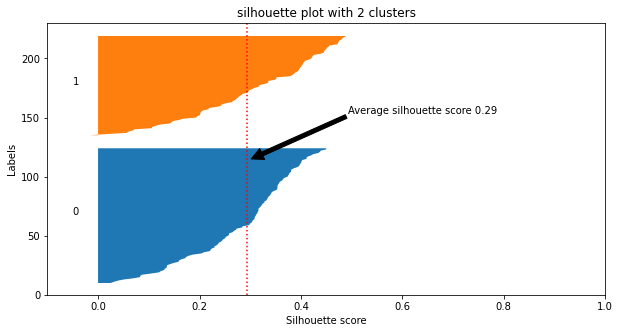

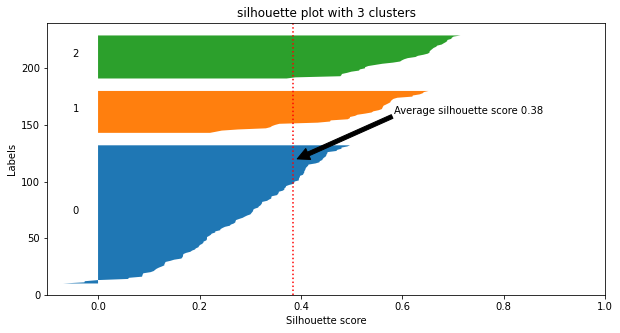

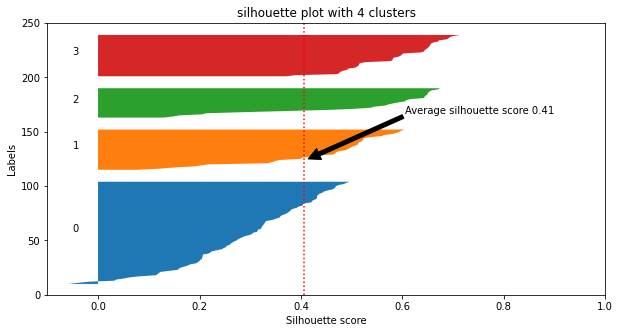

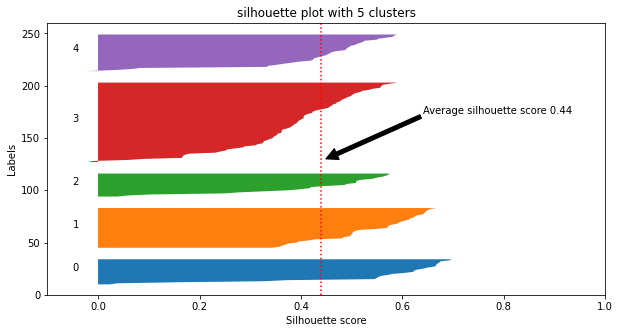

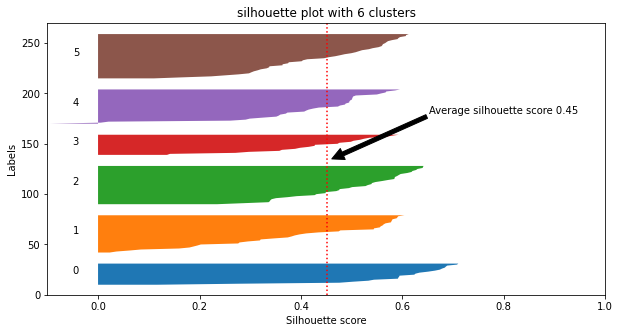

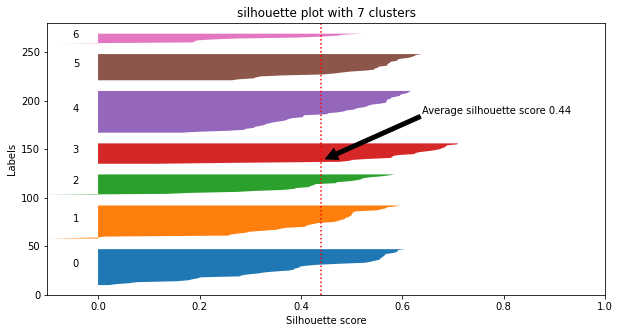

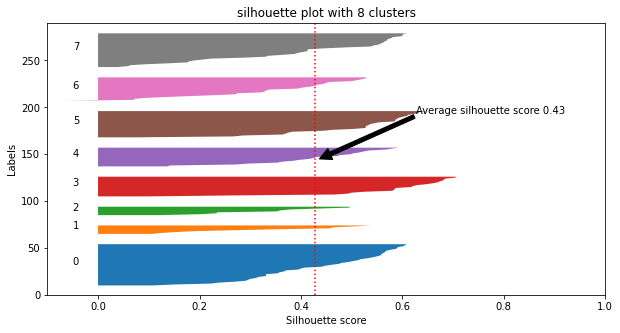

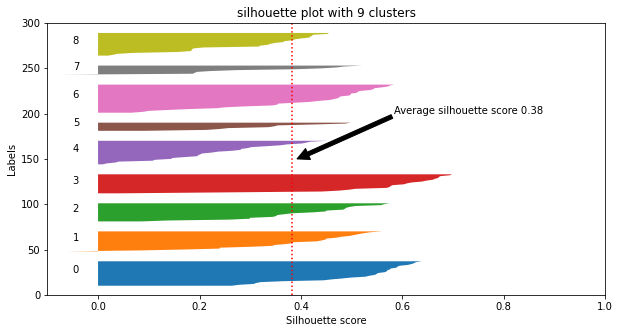

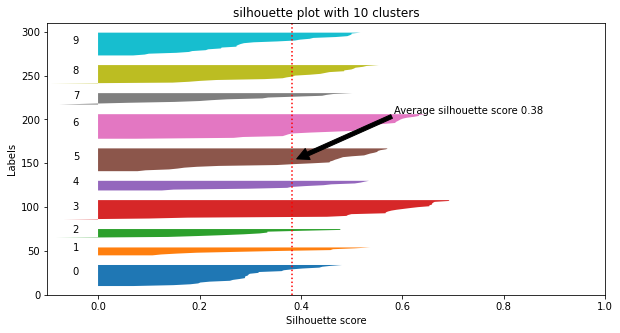

In [34]:
for k in k_s:
    index = k - min(k_s)
    silhouette_plot(dataset_hot, k, kmeans_labels_list[index], silhouette_score_list[index], silhouette_samples_list[index])

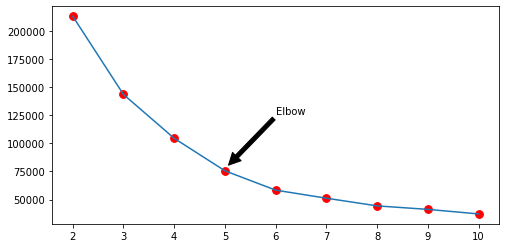

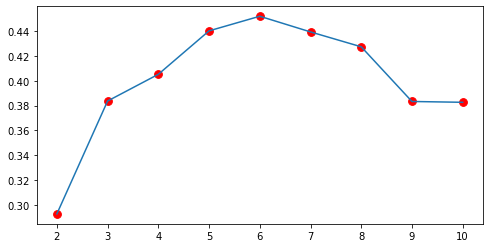

In [35]:
figure = plt.figure(figsize = (8, 4))
plt.plot(k_s, inertia_list)
plt.scatter(k_s, inertia_list, s=60, c = 'red')
plt.annotate('Elbow', xy=(5 + 0.07, inertia_list[3]+ 5000), 
            xytext=(5+1, inertia_list[3] + 50000),
            arrowprops=dict(facecolor='black'))
plt.show()

figure = plt.figure(figsize = (8, 4))
plt.plot(k_s, silhouette_score_list)
plt.scatter(k_s, silhouette_score_list, s=60, c = 'red')
plt.show()

In [36]:
kmeans_final = KMeans(n_clusters = 6)
labels = kmeans_final.fit_predict(dataset_hot)

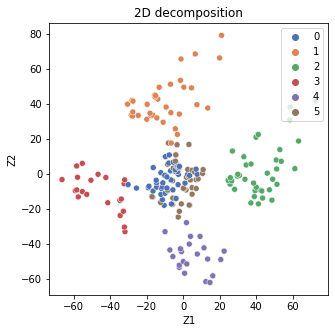

In [37]:
draw2D(dataset_hot_2, labels)

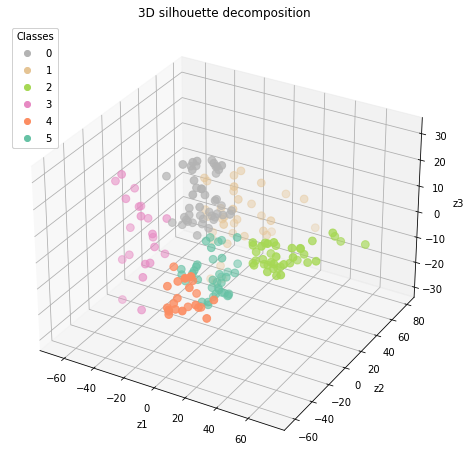

In [38]:
draw3D(dataset_hot_98, labels)

# Simple implementation of PCA in 'MyPCA.py'

In [39]:
from MyPCA import MyPCA

In [40]:
myPCA = MyPCA(2)

In [41]:
myPCA.fit(dataset_hot)
myData2D = myPCA.transform(dataset_hot)

In [42]:
myPCA.explained_variance_ratio_

array([0.45110884, 0.44084615])

In [43]:
pca2.explained_variance_ratio_

array([0.45110884, 0.44084615])

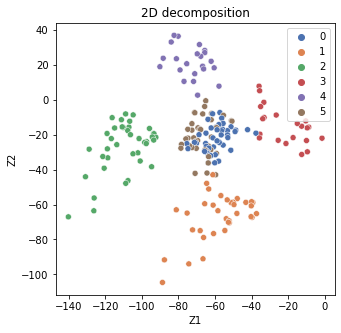

In [44]:
draw2D(dataset = myData2D, labels = labels)

# Using LocallyLinearEmbedding to dimensionality reduction

In [45]:
from sklearn.manifold import LocallyLinearEmbedding

In [46]:
lle2 = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
lle2_data = lle2.fit_transform(dataset_hot)

lle3 = LocallyLinearEmbedding(n_components=3, n_neighbors=10)
lle3_data = lle3.fit_transform(dataset_hot)

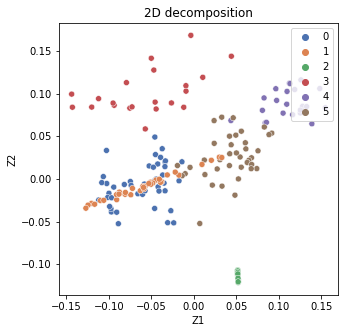

In [47]:
draw2D(lle2_data, labels)

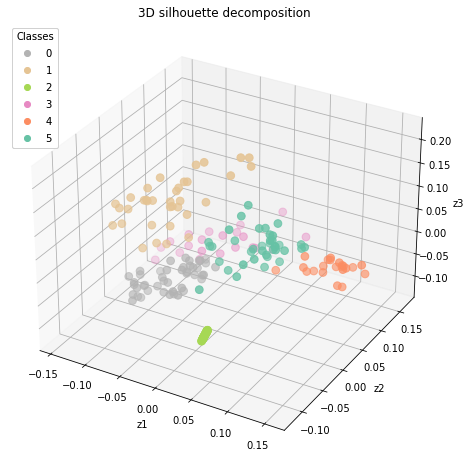

In [48]:
draw3D(lle3_data, labels)

# Using TSNE to dimensionality reduction

In [49]:
from sklearn.manifold import TSNE

In [50]:
tsne2 = LocallyLinearEmbedding(n_neighbors = 25, n_components=2)
tsne2_data = tsne2.fit_transform(dataset_hot)

tsne3 = LocallyLinearEmbedding(n_neighbors = 25, n_components=3)
tsne3_data = tsne3.fit_transform(dataset_hot)

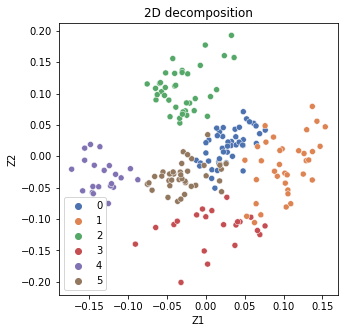

In [51]:
draw2D(tsne2_data, labels, loc_str = 'lower left')

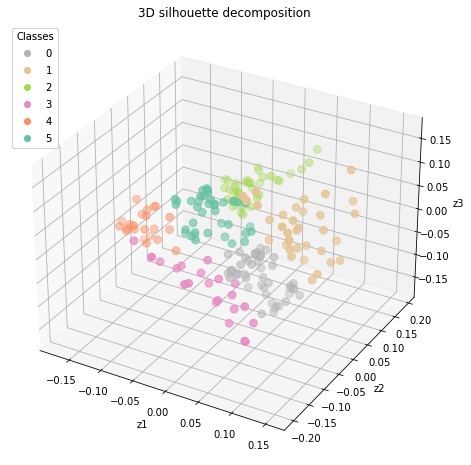

In [52]:
draw3D(tsne3_data, labels)

# Finding best params for DBSCAN 

In [53]:
def compute_distances(self, point, dataset, index):
    distance = np.array([])
        
    for i, data in enumerate(dataset):
        temp = np.sqrt(sum([pow(a - b, 2) for (a, b) in zip(point, data)]))
        distance = np.append(distance, temp)
    return distance

In [54]:
dataset_arr = np.array(dataset_hot)
smallest_distances = np.array([])
for index in range(dataset_hot.shape[0]):
    computed = compute_distances(None, dataset_arr[index], dataset_arr, index)
    smallest_distances = np.append(smallest_distances, 
                                   min(computed[np.nonzero(computed)]))

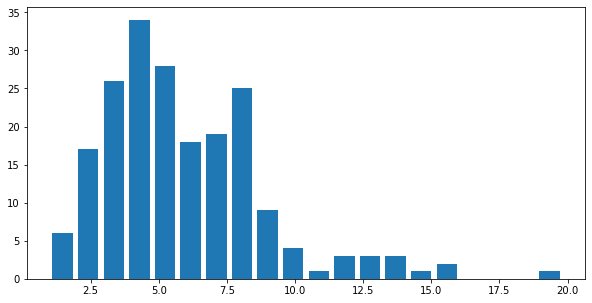

In [55]:
fig = plt.figure(figsize = (10, 5))
plt.hist(smallest_distances, bins = 20, rwidth=0.8)
plt.show()

In [56]:
from sklearn.neighbors import NearestNeighbors

In [57]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(dataset_arr)

In [58]:
distances, indices = nbrs.kneighbors(dataset_arr)

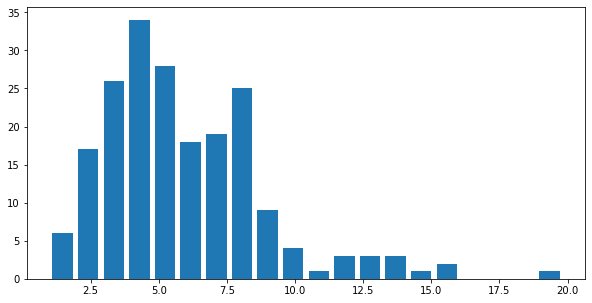

In [59]:
fig = plt.figure(figsize = (10, 5))
plt.hist(distances[:, 1] - distances[:, 0], bins = 20, rwidth=0.8)
plt.show()

In [60]:
from sklearn.cluster import DBSCAN

In [61]:
dbscan = DBSCAN(eps=13.5, min_samples=np.log(dataset_hot.shape[0]))
dbscan.fit(dataset_hot)

DBSCAN(eps=13.5, min_samples=5.298317366548036)

In [62]:
dbscan.labels_

array([-1,  0, -1,  0, -1,  0,  1,  0, -1,  0, -1, -1,  1,  0,  1,  0,  0,
        0,  0, -1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2, -1,  2,  0,  2,  3,  2,  3,  2,  0,  2, -1,  2,
        3,  2, -1,  2,  3,  2,  0,  2, -1,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  3,  2, -1,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2, -1,  2,  3,  2, -1,  2, -1,
        2, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [63]:
print(len(dbscan.core_sample_indices_))
print(dbscan.core_sample_indices_)

137
[  1   3   5   9  13  15  17  21  22  23  24  25  26  29  31  35  37  42
  43  45  46  47  48  49  50  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 125 126 127 129 130 131 133 135 136 137 139
 141 143 145 147 149 150 151 152 153 154 155 157 159 161 163 164 165 166
 167 170 171 172 173 174 175 177 179 181 183]


In [64]:
print(dbscan.components_[:10])
print(len(dbscan.components_))

[[21 15 81  0  1]
 [23 16 77  1  0]
 [22 17 76  1  0]
 [30 19 72  1  0]
 [24 20 77  1  0]
 [22 20 79  0  1]
 [20 21 66  0  1]
 [25 24 73  0  1]
 [46 25  5  1  0]
 [31 25 73  0  1]]
137


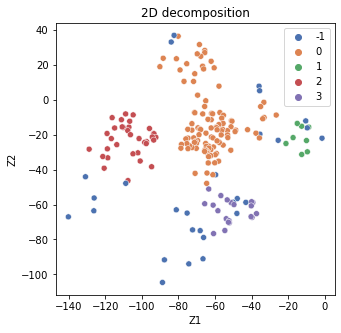

In [65]:
draw2D(myData2D, dbscan.labels_, loc_str = 'best')

In [66]:
def bind_method(instance, function, name = None):
    if name is None:
        name = function.__name__
    bound_method  = function.__get__(instance, instance.__class__)
    setattr(instance, name, bound_method)
    return bound_method

# Simple implementation of DBSCAN  in 'MyDBSCAN.py'

In [67]:
from MyDBSCAN import MyDBSCAN

In [68]:
myDBSCAN = MyDBSCAN(eps=13.5, min_samples=np.log(dataset_hot.shape[0]))

#Assign method to MyDBSCAN class.
bind_method(myDBSCAN, compute_distances)

#Test
myDBSCAN.compute_distances(dataset_arr[0], dataset_arr, 0)[:10]

array([ 0.        , 42.04759208, 33.06055051, 38.249183  , 12.28820573,
       37.20215048, 36.82390528, 55.24490927, 57.76677246, 35.04283094])

In [69]:
myDBSCAN.fit(dataset_arr)

In [70]:
print(len(myDBSCAN.core_instances_))
print(myDBSCAN.core_instances_)

137
[  1.   3.   5.   9.  13.  15.  17.  21.  22.  23.  24.  25.  26.  29.
  31.  35.  37.  42.  43.  45.  46.  47.  48.  49.  50.  52.  53.  54.
  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.
  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.
  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.
  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110.
 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 125.
 126. 127. 129. 130. 131. 133. 135. 136. 137. 139. 141. 143. 145. 147.
 149. 150. 151. 152. 153. 154. 155. 157. 159. 161. 163. 164. 165. 166.
 167. 170. 171. 172. 173. 174. 175. 177. 179. 181. 183.]


In [71]:
print(myDBSCAN.components_[:10])
print(len(myDBSCAN.components_))

[[21 15 81  0  1]
 [23 16 77  1  0]
 [22 17 76  1  0]
 [30 19 72  1  0]
 [24 20 77  1  0]
 [22 20 79  0  1]
 [20 21 66  0  1]
 [25 24 73  0  1]
 [46 25  5  1  0]
 [31 25 73  0  1]]
137


In [72]:
myDBSCAN.labels_

array([-1,  0, -1,  0, -1,  0,  1,  0, -1,  0, -1, -1,  1,  0,  1,  0,  0,
        0,  0, -1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2, -1,  2,  0,  2,  3,  2,  3,  2,  0,  2, -1,  2,
        3,  2, -1,  2,  3,  2,  0,  2, -1,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  3,  2, -1,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2, -1,  2,  3,  2, -1,  2, -1,
        2, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [73]:
(myDBSCAN.labels_ == dbscan.labels_).all()

True

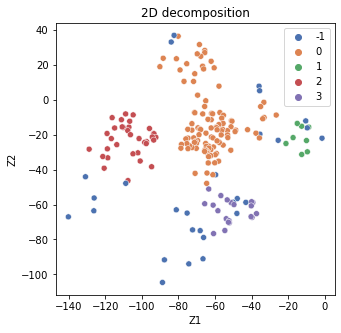

In [74]:
draw2D(myData2D, myDBSCAN.labels_, loc_str = 'best')